# Кластеризация ЕГЭ (8.5 если сделаны все задачи)

Рядом лежат экселевские таблицы с координатами точек. В 3 и 4 задаче используется манхетеское расстояние. В остальных Евклидово.

* Постройте Распределение точек
* Кластеризуйте руками
* Постройте Распределение точек, отметьте принадлежность кластеров цветами
* Найдите среди в каждом кластере точку расстояние от которой до всех остальных минимально
* Выведите усреднение центров всех кластеров * 1000

C:\Users\slivantus2007\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\slivantus2007\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


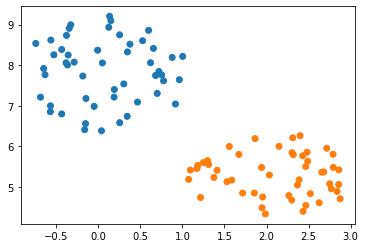

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def dist(x1, x2, y1, y2):
    return (x1-x2)*(x1-x2)+(y1-y2)*(y1-y2)

df = pd.read_csv("0.csv", delimiter=';')
df.X = df.X.astype("float")
df.Y = df.Y.astype("float")
color = ["#1f77b4" if dist(df.X[i], 0, df.Y[i], 8) < dist(df.X[i], 2, df.Y[i], 5) else '#ff7f0e' for i in range(100)]
plt.scatter(df.X, df.Y, c=color)

In [2]:
import math
xb=0
yb=0
xo=0
yo=0
db=1000000000
do=1000000000

for i in range(100):
    if(color[i] == "#1f77b4"):
        cd = 0
        for j in range(100):
            if(color[j] != "#1f77b4"):
                continue
            cd += dist(df.X[i], df.X[j], df.Y[i], df.Y[j])
        if cd < db:
            db = cd
            xb = df.X[i]
            yb = df.Y[i]
    else:
        cd = 0
        for j in range(100):
            if(color[j] == "#1f77b4"):
                continue
            cd += dist(df.X[i], df.X[j], df.Y[i], df.Y[j])
        if cd < do:
            do = cd
            xo = df.X[i]
            yo = df.Y[i]
            
print(int((xb+xo)/2*1000), int((yb+yo)/2*1000))
print(math.floor((xb+xo)/2*1000), math.floor((yb+yo)/2*1000))

1041 6671
1041 6671


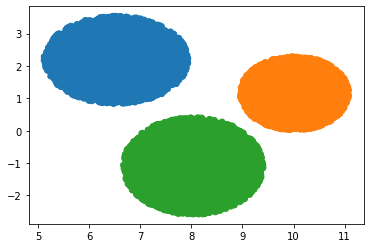

In [3]:
df = pd.read_csv("1.csv", delimiter=';')
df.X = df.X.astype("float")
df.Y = df.Y.astype("float")
color = [0.0 for i in range(9999)]
for i in range(9999):
    d1 = dist(df.X[i], 6, df.Y[i], 2)
    d2 = dist(df.X[i], 10, df.Y[i], 1)
    d3 = dist(df.X[i], 8, df.Y[i], -1)
    if d1 < d2 and d1 < d3:
        color[i] = "#1f77b4"
    elif d2 < d1 and d2 < d3:
        color[i] = '#ff7f0e'
    else:
        color[i] = '#2ca02c'
#color = ["#1f77b4" if dist(df.X[i], 0, df.Y[i], 8) < dist(df.X[i], 2, df.Y[i], 5) else '#ff7f0e' for i in range(100)]
plt.scatter(df.X, df.Y, c=color)

In [4]:
import math
xb=0
yb=0
xo=0
yo=0
xg=0
yg=0
db=1000000000
do=1000000000
dg=1000000000

for i in range(9999):
    if(color[i] == "#1f77b4"):
        cd = 0
        for j in range(9999):
            if(color[j] != "#1f77b4"):
                continue
            cd += dist(df.X[i], df.X[j], df.Y[i], df.Y[j])
            if(cd > db):
                break
        if cd < db:
            db = cd
            xb = df.X[i]
            yb = df.Y[i]
    elif color[i] == '#ff7f0e':
        cd = 0
        for j in range(9999):
            if(color[j] != '#ff7f0e'):
                continue
            cd += dist(df.X[i], df.X[j], df.Y[i], df.Y[j])
            if(cd > do):
                break
        if cd < do:
            do = cd
            xo = df.X[i]
            yo = df.Y[i]
    else:
        cd = 0
        for j in range(9999):
            if(color[j] != '#2ca02c'):
                continue
            cd += dist(df.X[i], df.X[j], df.Y[i], df.Y[j])
            if(cd > dg):
                break
        if cd < dg:
            dg = cd
            xg = df.X[i]
            yg = df.Y[i]
            
print(int((xb+xo+xg)/3*1000), int((yb+yo+yg)/3*1000))
print(math.floor((xb+xo+xg)/3*1000), math.floor((yb+yo+yg)/3*1000))

8196 728
8196 728


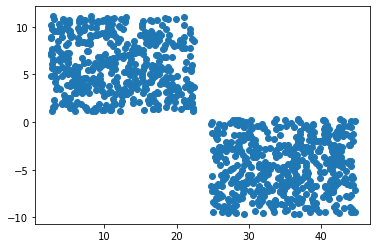

In [11]:
def mdist(x1, x2, y1, y2):
    return abs(x1-x2)+abs(y1-y2)
df = pd.read_csv("2.csv", delimiter=';')
df.X = df.X.astype("float")
df.Y = df.Y.astype("float")

plt.scatter(df.X, df.Y)

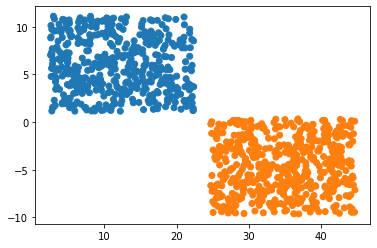

In [12]:
color = ["#1f77b4" if mdist(df.X[i], 15, df.Y[i], 5) < mdist(df.X[i], 30, df.Y[i], -5) else '#ff7f0e' for i in range(1000)]
plt.scatter(df.X, df.Y, c=color)

In [13]:
xb=0
yb=0
xo=0
yo=0
db=1000000000
do=1000000000

for i in range(1000):
    if(color[i] == "#1f77b4"):
        cd = 0
        for j in range(1000):
            if(color[j] != "#1f77b4"):
                continue
            cd += mdist(df.X[i], df.X[j], df.Y[i], df.Y[j])
        if cd < db:
            db = cd
            xb = df.X[i]
            yb = df.Y[i]
    else:
        cd = 0
        for j in range(1000):
            if(color[j] == "#1f77b4"):
                continue
            cd += mdist(df.X[i], df.X[j], df.Y[i], df.Y[j])
        if cd < do:
            do = cd
            xo = df.X[i]
            yo = df.Y[i]
            
print(int((xb+xo)/2*1000), int((yb+yo)/2*1000))
print(math.floor((xb+xo)/2*1000), math.floor((yb+yo)/2*1000))

23509 554
23509 554


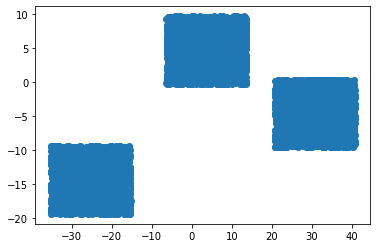

In [15]:
df = pd.read_csv("3.csv", delimiter=';')
df.X = df.X.astype("float")
df.Y = df.Y.astype("float")

plt.scatter(df.X, df.Y)

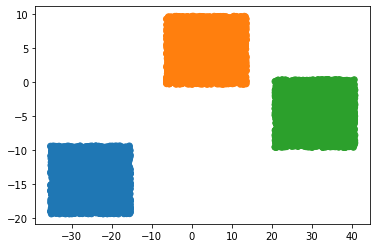

In [16]:
color = [0.0 for i in range(10000)]
for i in range(10000):
    d1 = dist(df.X[i], -25, df.Y[i], -15)
    d2 = dist(df.X[i], 2, df.Y[i], 5)
    d3 = dist(df.X[i], 30, df.Y[i], -5)
    if d1 < d2 and d1 < d3:
        color[i] = "#1f77b4"
    elif d2 < d1 and d2 < d3:
        color[i] = '#ff7f0e'
    else:
        color[i] = '#2ca02c'
#color = ["#1f77b4" if dist(df.X[i], 0, df.Y[i], 8) < dist(df.X[i], 2, df.Y[i], 5) else '#ff7f0e' for i in range(100)]
plt.scatter(df.X, df.Y, c=color)

In [18]:
xb=0
yb=0
xo=0
yo=0
xg=0
yg=0
db=1000000000
do=1000000000
dg=1000000000

for i in range(10000):
    if(color[i] == "#1f77b4"):
        cd = 0
        for j in range(10000):
            if(color[j] != "#1f77b4"):
                continue
            cd += mdist(df.X[i], df.X[j], df.Y[i], df.Y[j])
            if(cd > db):
                break
        if cd < db:
            db = cd
            xb = df.X[i]
            yb = df.Y[i]
    elif color[i] == '#ff7f0e':
        cd = 0
        for j in range(10000):
            if(color[j] != '#ff7f0e'):
                continue
            cd += mdist(df.X[i], df.X[j], df.Y[i], df.Y[j])
            if(cd > do):
                break
        if cd < do:
            do = cd
            xo = df.X[i]
            yo = df.Y[i]
    else:
        cd = 0
        for j in range(10000):
            if(color[j] != '#2ca02c'):
                continue
            cd += mdist(df.X[i], df.X[j], df.Y[i], df.Y[j])
            if(cd > dg):
                break
        if cd < dg:
            dg = cd
            xg = df.X[i]
            yg = df.Y[i]
            
print(int((xb+xo+xg)/3*1000), int((yb+yo+yg)/3*1000))
print(math.floor((xb+xo+xg)/3*1000), math.floor((yb+yo+yg)/3*1000))

3078 -4758
3078 -4759


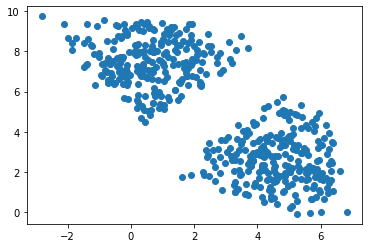

In [19]:
df = pd.read_csv("4.csv", delimiter=';')
df.X = df.X.astype("float")
df.Y = df.Y.astype("float")

plt.scatter(df.X, df.Y)

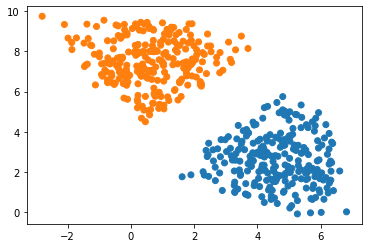

In [21]:
color = ["#1f77b4" if dist(df.X[i], 5, df.Y[i], 2) < dist(df.X[i], 0, df.Y[i], 7) else '#ff7f0e' for i in range(500)]
plt.scatter(df.X, df.Y, c=color)

In [24]:
xb=0
yb=0
xo=0
yo=0
db=1000000000
do=1000000000

for i in range(500):
    if(color[i] == "#1f77b4"):
        cd = 0
        for j in range(500):
            if(color[j] != "#1f77b4"):
                continue
            cd += dist(df.X[i], df.X[j], df.Y[i], df.Y[j])
        if cd < db:
            db = cd
            xb = df.X[i]
            yb = df.Y[i]
    else:
        cd = 0
        for j in range(500):
            if(color[j] == "#1f77b4"):
                continue
            cd += dist(df.X[i], df.X[j], df.Y[i], df.Y[j])
        if cd < do:
            do = cd
            xo = df.X[i]
            yo = df.Y[i]
            
print(int((xb+xo)/2*1000), int((yb+yo)/2*1000))
print(math.floor((xb+xo)/2*1000), math.floor((yb+yo)/2*1000))

2588 4996
2588 4996


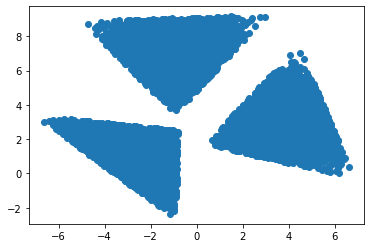

In [25]:
df = pd.read_csv("5.csv", delimiter=';')
df.X = df.X.astype("float")
df.Y = df.Y.astype("float")

plt.scatter(df.X, df.Y)

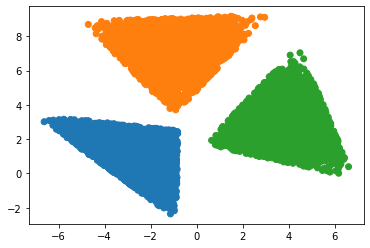

In [26]:
color = [0.0 for i in range(9999)]
for i in range(9999):
    d1 = dist(df.X[i], -3, df.Y[i], 1)
    d2 = dist(df.X[i], -1, df.Y[i], 6)
    d3 = dist(df.X[i], 4, df.Y[i], 2)
    if d1 < d2 and d1 < d3:
        color[i] = "#1f77b4"
    elif d2 < d1 and d2 < d3:
        color[i] = '#ff7f0e'
    else:
        color[i] = '#2ca02c'
#color = ["#1f77b4" if dist(df.X[i], 0, df.Y[i], 8) < dist(df.X[i], 2, df.Y[i], 5) else '#ff7f0e' for i in range(100)]
plt.scatter(df.X, df.Y, c=color)

In [27]:
xb=0
yb=0
xo=0
yo=0
xg=0
yg=0
db=1000000000
do=1000000000
dg=1000000000

for i in range(9999):
    if(color[i] == "#1f77b4"):
        cd = 0
        for j in range(9999):
            if(color[j] != "#1f77b4"):
                continue
            cd += mdist(df.X[i], df.X[j], df.Y[i], df.Y[j])
            if(cd > db):
                break
        if cd < db:
            db = cd
            xb = df.X[i]
            yb = df.Y[i]
    elif color[i] == '#ff7f0e':
        cd = 0
        for j in range(9999):
            if(color[j] != '#ff7f0e'):
                continue
            cd += mdist(df.X[i], df.X[j], df.Y[i], df.Y[j])
            if(cd > do):
                break
        if cd < do:
            do = cd
            xo = df.X[i]
            yo = df.Y[i]
    else:
        cd = 0
        for j in range(9999):
            if(color[j] != '#2ca02c'):
                continue
            cd += mdist(df.X[i], df.X[j], df.Y[i], df.Y[j])
            if(cd > dg):
                break
        if cd < dg:
            dg = cd
            xg = df.X[i]
            yg = df.Y[i]
            
print(int((xb+xo+xg)/3*1000), int((yb+yo+yg)/3*1000))
print(math.floor((xb+xo+xg)/3*1000), math.floor((yb+yo+yg)/3*1000))

119 3791
119 3791


# Кластеризация (0.75 за каждый алгоритм на всех данных)

На предложенных распределениях данных проверьте предложенные алгоритмы. Постройте графики кластеризации для каждой пары алгоритм-данные, разные кластеры покрасьте разным цветом. Воспользуйтесь sklearn реализациями. Параметры кластеризации для разных алгоритмов подберите такие, чтобы алгоритмы можно было сравнивать (по возможности одинаковое количество кластеров и т.д.)

In [46]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [47]:
two_means = cluster.MiniBatchKMeans(n_clusters=2)
dbscan = cluster.DBSCAN()

clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("DBSCAN", dbscan),
    )

AttributeError: 'NoneType' object has no attribute 'split'

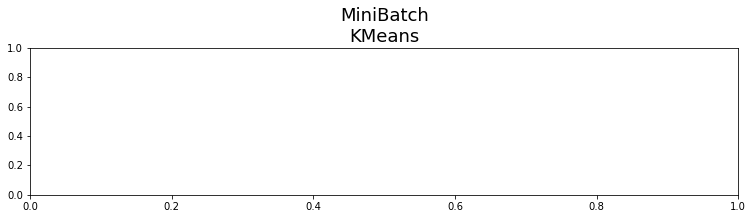

In [48]:
np.random.seed(42)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 10,
    "n_clusters": 3,
    "min_samples": 20,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 20,
            "xi": 0.25,
        },
    ),
    (noisy_moons, {"damping": 0.75, "preference": -220, "n_clusters": 2}),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 5,
            "xi": 0.035,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 20,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    for name, algorithm in clustering_algorithms:
        t0 = time.time()
    
        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
            
        algorithm.fit(X)
        y_pred = algorithm.labels_
        
        
        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
    
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1
plt.show()